In [130]:

# importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report , roc_auc_score



In [101]:
titanic = pd.read_excel('titanic.xls')
titanic.tail(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [102]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [103]:
titanic = titanic.drop([ 'ticket','cabin','embarked','boat','home.dest','name' ,'body'], axis=1)
titanic.head(5)

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


In [104]:
 # sex
sex_encoder=LabelEncoder()
titanic['sex']= sex_encoder.fit_transform(titanic['sex'])

# age  
age_imputer = SimpleImputer(strategy='mean')
titanic['age']=age_imputer.fit_transform(titanic[['age']])

#fare
fare_imputer = SimpleImputer(strategy='mean')
titanic['fare'] = fare_imputer.fit_transform(titanic[['fare']])

In [143]:
titanic.head(5)

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,0,29.0000,0,0,211.3375
1,1,1,1,0.9167,1,2,151.5500
2,1,0,0,2.0000,1,2,151.5500
3,1,0,1,30.0000,1,2,151.5500
4,1,0,0,25.0000,1,2,151.5500


In [144]:
titanic.isnull().sum().sum()

0

In [106]:

# extracting features and target from our data: titanic
x = titanic[['pclass','sex','age','sibsp','parch','fare']]
y = titanic['survived']


In [107]:
# splitting data with test size of 25%
x_train , x_test , y_train, y_test =train_test_split(x,y,random_state=0)
(x_train.shape,y_test.shape)

((981, 6), (328,))

# Logistic Regression

In [108]:
logreg = LogisticRegression()# build our logistic model 
logreg.fit(x_train,y_train)# fiting training data

LogisticRegression()

In [109]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test))) # model's score


Accuracy=0.79


In [122]:
# survie function  to predict if a passenger will survive or not

def survie(model,pclass=3,sex=1, age=35, sibsp=0, parch=0, fare=14):
    x=np.array([[pclass,sex,age,sibsp,parch,fare]])
    print(model.predict(x))
    # model predict proba
    print(model.predict_proba(x))

    
  

In [123]:
survie(logreg)
# probabilité de survivre = 0.89 c  pour cette raison il appartient à la classe 0 

[0]
[[0.89584466 0.10415534]]


In [128]:
 # another sample
survie(logreg , pclass=2 , sex=0 , age=50)


[1]
[[0.31660943 0.68339057]]


# Evaluate logistic Regression performance

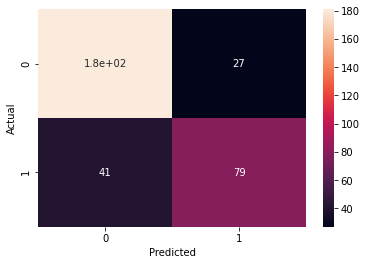

In [86]:

# compute confusion matrics to evaluate the accurancy of a classification
confusion_matrix=pd.crosstab(y_test,logreg.predict(x_test),rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix , annot=True)


# Classification report

In [90]:
# build a text report showing the main classification metrics
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       208
           1       0.75      0.66      0.70       120

    accuracy                           0.79       328
   macro avg       0.78      0.76      0.77       328
weighted avg       0.79      0.79      0.79       328



roc auc _score compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.We can  used it with binary(our case), multiclass and multilabel classification. 
 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score



In [141]:
logreg.predict_proba(x_test)

array([[0.90607562, 0.09392438],
       [0.1573322 , 0.8426678 ],
       [0.8597215 , 0.1402785 ],
       [0.87898569, 0.12101431],
       [0.70595172, 0.29404828],
       [0.27807868, 0.72192132],
       [0.67727692, 0.32272308],
       [0.70300424, 0.29699576],
       [0.87803427, 0.12196573],
       [0.88080817, 0.11919183],
       [0.74651359, 0.25348641],
       [0.91843025, 0.08156975],
       [0.63478998, 0.36521002],
       [0.28800502, 0.71199498],
       [0.08055523, 0.91944477],
       [0.71089722, 0.28910278],
       [0.36863677, 0.63136323],
       [0.61472614, 0.38527386],
       [0.17596413, 0.82403587],
       [0.89113974, 0.10886026],
       [0.85122983, 0.14877017],
       [0.95152496, 0.04847504],
       [0.87426253, 0.12573747],
       [0.06611927, 0.93388073],
       [0.83572765, 0.16427235],
       [0.26332727, 0.73667273],
       [0.67611296, 0.32388704],
       [0.89737245, 0.10262755],
       [0.8786982 , 0.1213018 ],
       [0.26293853, 0.73706147],
       [0.

In [142]:
roc_auc_score(y_test,logreg.predict_proba(x_test)[:, 1])

0.8386217948717948